## EEG Data Analysis
This notebook will guide you through the process of importing, loading, and exploring EEG data for further analysis.

Step 1: Import Necessary Libraries

In [2]:
# Step 1: Import Necessary Libraries
import pandas as pd

# Step 2: Load the Data
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = 'features_raw.csv'
data = pd.read_csv(file_path)

# Step 3: Explore the Data
# Check the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check the shape of the data
print("\nShape of the dataset:")
print(data.shape)

# Get summary information about the data
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

First 5 rows of the dataset:
        Fp1        AF3        F3         F7       FC5       FC1        C3  \
0  0.057813  -1.335266  4.640480   0.219573  7.473817  2.314842  1.918097   
1  1.367408  10.259654  3.345409   7.897852 -2.446051 -1.655035 -6.301423   
2 -1.783132   4.133553 -0.951680  -1.624803 -1.827309 -2.280364 -2.279225   
3 -3.690217  -0.814000  2.295469   0.901445  8.323679  1.127906  6.356886   
4  2.137114   6.420466  6.122230  10.015321  3.106394  3.183129  3.658535   

          T7       CP5       CP1  ...        Cz        C4         T8  \
0  -9.257533  9.089943 -7.104519  ... -2.241480  1.415335   2.406646   
1  -7.290317 -3.546453 -5.705187  ... -2.568397 -5.651418  -0.096730   
2   9.151344 -0.239575 -0.057604  ... -2.132823 -0.521117   8.605298   
3  11.642082  9.354154 -1.662478  ... -0.506117 -1.154866  -3.940251   
4   4.571793  4.917712 -2.325940  ...  1.813907 -6.444635 -27.680880   

         CP6       CP2        P4        P8       PO4        O2  Unnamed: 32

## Observations from the Dataset

- **EEG Channels**: The dataset consists of 32 EEG channels, represented by columns such as `Fp1`, `AF3`, `F3`, etc.
- **Shape**: The dataset contains 8064 rows and 33 columns.
- **Missing Data**: The column `Unnamed: 32` contains no valid data (all values are NaN) and should be dropped from the dataset.
- **Data Types**: All columns are numeric (`float64`), which is ideal for numerical analysis.

## Observations from the Dataset

- **EEG Channels**: The dataset consists of 32 EEG channels, represented by columns such as `Fp1`, `AF3`, `F3`, etc.
- **Shape**: The dataset contains 8064 rows and 33 columns.
- **Missing Data**: The column `Unnamed: 32` contains no valid data (all values are NaN) and should be dropped from the dataset.
- **Data Types**: All columns are numeric (`float64`), which is ideal for numerical analysis.

## Next Step: Preprocessing the Data

1. **Drop the Empty Column**: 
   - We will remove the `Unnamed: 32` column, as it contains no useful data.

2. **Check for Data Consistency**: 
   - We will verify whether all EEG channels have the same sampling rate or time interval. We will assume each row represents one time sample unless specified otherwise.

3. **Plot Sample Data**: 
   - We will visualize the signal from a few EEG channels to understand the trends and patterns within the dataset.


Shape after dropping empty column: (8064, 32)


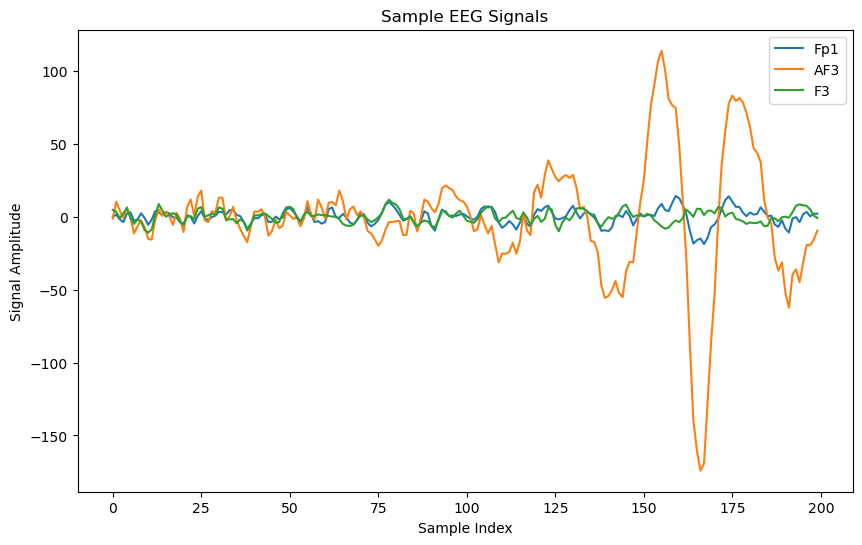

In [4]:
import matplotlib.pyplot as plt

# Step 1: Drop the empty column
data_cleaned = data.drop(columns=["Unnamed: 32"])
print("Shape after dropping empty column:", data_cleaned.shape)

# Step 2: Plot a few EEG signals
plt.figure(figsize=(10, 6))

# Plot signals from a few EEG channels
channels_to_plot = ['Fp1', 'AF3', 'F3']  # Select some columns to visualize
for channel in channels_to_plot:
    plt.plot(data_cleaned[channel][:200], label=channel)  # Plot first 200 samples for clarity

plt.title('Sample EEG Signals')
plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.show()

## Code for Basic Statistics:

      count      mean        std         min        25%       50%        75%  \
Fp1  8064.0 -0.030110   4.303870  -21.068011  -2.741710  0.065934   2.800696   
AF3  8064.0  0.049626  19.050580 -174.162043  -6.946013  0.079142   7.236850   
F3   8064.0 -0.000615   4.949803  -32.576432  -2.907836  0.016822   2.968202   
F7   8064.0  0.012063  19.530056 -119.687503  -8.685504  0.050682   8.973624   
FC5  8064.0 -0.072324  14.974316 -104.400666  -5.854239 -0.196773   5.405050   
FC1  8064.0 -0.005855   5.223861  -31.009221  -2.613004 -0.023871   2.623072   
C3   8064.0 -0.051846  14.165469 -102.940922  -4.874130 -0.055134   4.686449   
T7   8064.0  0.080661  20.447003 -175.751521  -9.294624  0.028703   9.383725   
CP5  8064.0 -0.123370  24.640017 -181.618505  -7.736768 -0.234875   7.317881   
CP1  8064.0  0.048696  12.291358 -107.664139  -5.723207  0.190146   5.932243   
P3   8064.0 -0.062844   8.581684  -58.370389  -4.044260 -0.185827   3.717946   
P7   8064.0 -0.089181  11.800734  -65.72

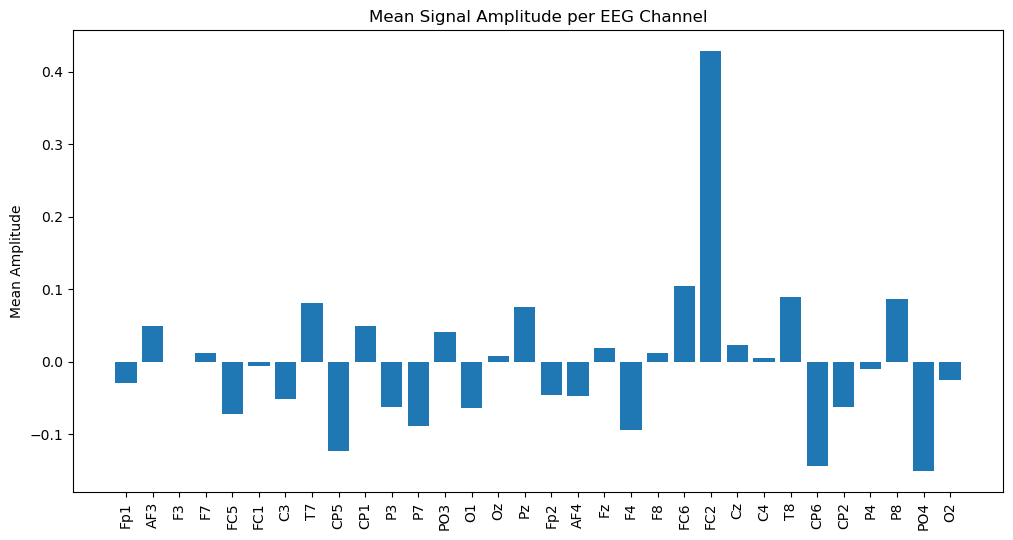

In [5]:
# Calculate basic statistics
basic_stats = data_cleaned.describe().T
print(basic_stats)

# Plot the mean signal of each channel
plt.figure(figsize=(12, 6))
plt.bar(data_cleaned.columns, data_cleaned.mean())
plt.title('Mean Signal Amplitude per EEG Channel')
plt.ylabel('Mean Amplitude')
plt.xticks(rotation=90)
plt.show()

## Observations from the EEG Channel Statistics

- **Mean Values**: 
  - The EEG signals show a mix of positive and negative values. This suggests that the baseline is centered around zero for some channels but exhibits significant variations in others.

- **Standard Deviation**: 
  - Several channels exhibit high standard deviations, indicating considerable variability in the signal. For instance, the channel `FC2` has a very high standard deviation (87.65), which could indicate large fluctuations or a higher degree of noise.

- **Min and Max Values**: 
  - Some channels, such as `FC2`, `CP6`, and `PO4`, display extreme values (e.g., -839.74 to 598.45 for FC2). These extreme values may be indicative of noise or artifacts in the data that require further handling or cleaning.

## Outlier Detection

Given the high variability and extreme values observed in the EEG channels, it may be beneficial to detect and potentially remove outliers. 

- **Reason for Detection**: 
  - Channels with large max-min ranges or extreme values, such as `FC2`, `CP6`, and `PO4`, may contain unusual spikes or artifacts that do not reflect the true EEG signal.

- **Next Steps**:
  - Implement statistical methods (e.g., Z-score, IQR) to identify outliers in the data.
  - Evaluate whether these outliers are artifacts and decide if they should be removed to improve data quality and analysis accuracy.


In [6]:
# Calculate IQR for each column
df = data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter the dataframe to remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the dataframe after removing outliers
df_no_outliers

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.567118,-2.565003,-1.522477,-11.039019,-5.149069,2.128236,-0.799226,15.032485,-7.521581,10.169485,...,1.473278,6.960514,13.663231,-15.992135,-9.883775,-2.666718,-1.089576,-21.818477,-5.304913,NaN
8058,-2.987892,-7.288828,0.184647,-9.073935,2.807798,1.892723,3.364325,9.339902,3.462884,2.515570,...,0.314351,4.415597,-7.602381,3.204363,1.678654,5.062885,3.973062,3.925280,4.755280,NaN
8059,2.371097,6.525279,-1.470521,-2.535683,-8.222570,-2.062185,-5.890198,11.508550,-14.298769,9.859735,...,0.407407,-0.032451,12.929205,-27.406610,-14.864499,-6.631102,7.509646,-25.823920,-3.558200,NaN
8061,-1.308237,1.166170,-3.158261,-9.249685,-7.438499,0.591557,-1.791961,16.107009,-9.831608,17.049193,...,3.080318,3.275846,-22.535264,-26.538050,-15.409645,-4.558339,4.718691,-28.783795,-3.566724,NaN


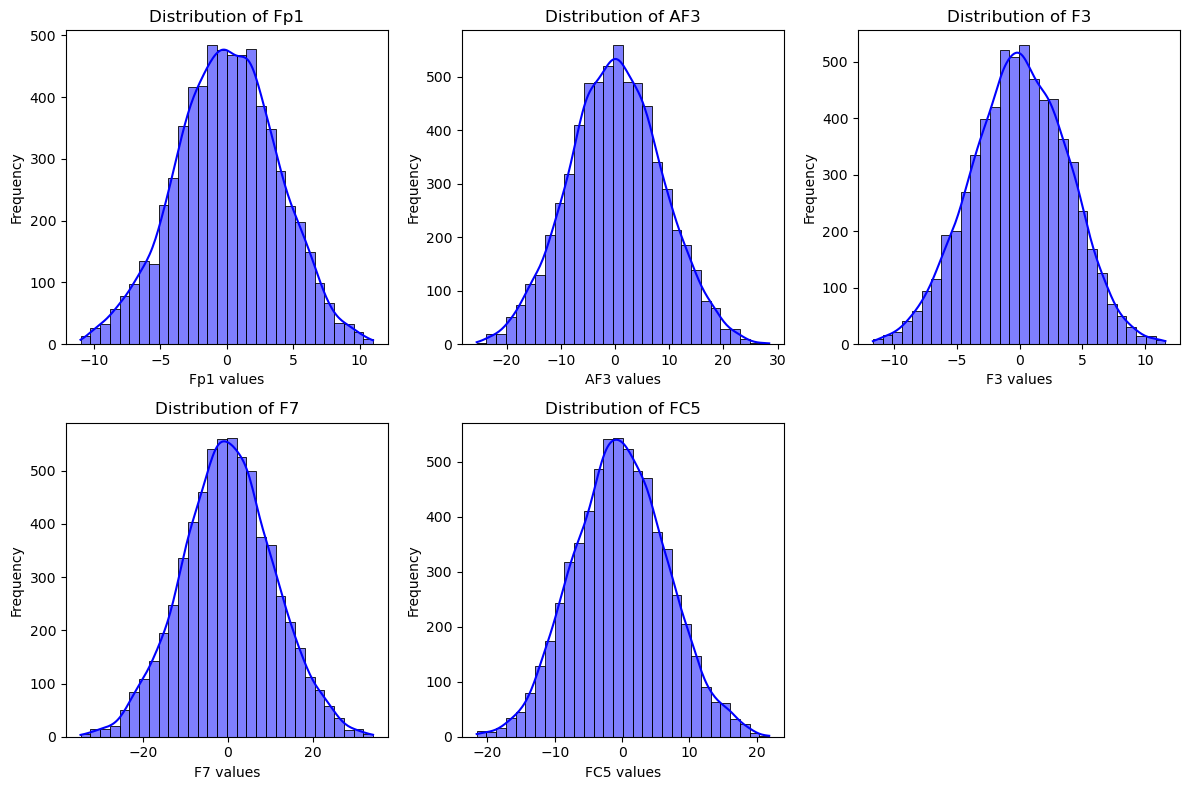

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = df_no_outliers
# Choose a few channels to plot histograms
channels_to_plot = ['Fp1', 'AF3', 'F3', 'F7', 'FC5']

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a histogram for each selected channel
for i, channel in enumerate(channels_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_cleaned[channel], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {channel}')
    plt.xlabel(f'{channel} values')
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

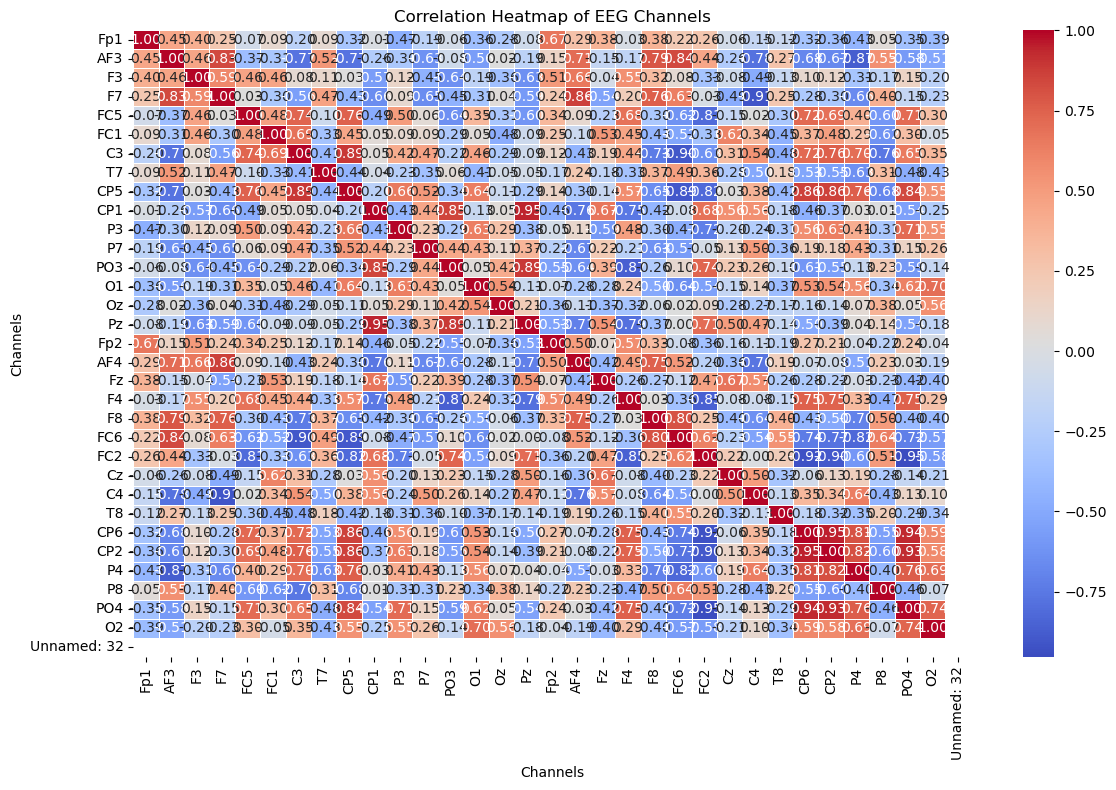

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the plot
plt.figure(figsize=(12, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of EEG Channels')
plt.xlabel('Channels')
plt.ylabel('Channels')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Display the correlation matrix as a table
correlation_table = correlation_matrix.round(2)  # Round the correlation coefficients to two decimal places
correlation_table

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
Fp1,1.00,0.45,0.40,0.25,-0.07,0.09,-0.20,0.09,-0.32,-0.01,...,-0.06,-0.15,-0.12,-0.32,-0.36,-0.43,0.05,-0.35,-0.39,NaN
AF3,0.45,1.00,0.46,0.83,-0.37,-0.31,-0.77,0.52,-0.77,-0.26,...,-0.26,-0.78,0.27,-0.68,-0.67,-0.87,0.55,-0.58,-0.51,NaN
F3,0.40,0.46,1.00,0.59,0.46,0.46,0.08,0.11,0.03,-0.57,...,-0.08,-0.49,-0.13,0.10,0.12,-0.31,-0.17,0.15,-0.20,NaN
F7,0.25,0.83,0.59,1.00,0.03,-0.30,-0.56,0.47,-0.43,-0.66,...,-0.49,-0.91,0.25,-0.28,-0.30,-0.66,0.40,-0.15,-0.23,NaN
FC5,-0.07,-0.37,0.46,0.03,1.00,0.48,0.74,-0.10,0.76,-0.49,...,-0.15,0.02,-0.30,0.72,0.69,0.40,-0.60,0.71,0.30,NaN
FC1,0.09,-0.31,0.46,-0.30,0.48,1.00,0.69,-0.33,0.45,0.05,...,0.62,0.34,-0.45,0.37,0.48,0.29,-0.62,0.30,-0.05,NaN
C3,-0.20,-0.77,0.08,-0.56,0.74,0.69,1.00,-0.41,0.89,0.05,...,0.31,0.54,-0.48,0.72,0.76,0.70,-0.76,0.65,0.35,NaN
T7,0.09,0.52,0.11,0.47,-0.10,-0.33,-0.41,1.00,-0.44,-0.04,...,-0.28,-0.50,0.18,-0.53,-0.55,-0.63,0.31,-0.48,-0.43,NaN
CP5,-0.32,-0.77,0.03,-0.43,0.76,0.45,0.89,-0.44,1.00,-0.20,...,0.03,0.38,-0.42,0.86,0.86,0.76,-0.68,0.84,0.55,NaN
CP1,-0.01,-0.26,-0.57,-0.66,-0.49,0.05,0.05,-0.04,-0.20,1.00,...,0.56,0.56,-0.18,-0.46,-0.37,0.03,0.01,-0.54,-0.25,NaN


## Correlation Analysis

### Positive Correlations:
- Values close to +1 indicate a strong positive relationship, meaning that the two regions tend to show similar activity.
- For example, the correlation between electrodes `Fp1` and `F7` is 0.25, which indicates a weak positive relationship. 
- Stronger correlations (e.g., 0.83 between `AF3` and `F7`) suggest that those regions are more likely to have similar signal patterns.

### Negative Correlations:
- Values close to -1 indicate a strong negative relationship, meaning that one region's activity tends to be the inverse of the other's.
- For example, the correlation between `FC5` and `F7` is -0.37, which shows a negative correlation. This might suggest that these regions exhibit opposite patterns of activity.

### Zero or Near-Zero Correlations:
- A value close to 0 indicates no linear relationship between the two regions.
- For instance, the correlation between `F3` and `F7` is 0.59, which shows a weak positive correlation. This suggests a slight tendency for these areas to show similar activity, but the relationship is not strong.

### Diagonal Values:
- The diagonal values in the correlation matrix are always 1, as they represent the correlation of each region with itself. This is naturally perfectly correlated.


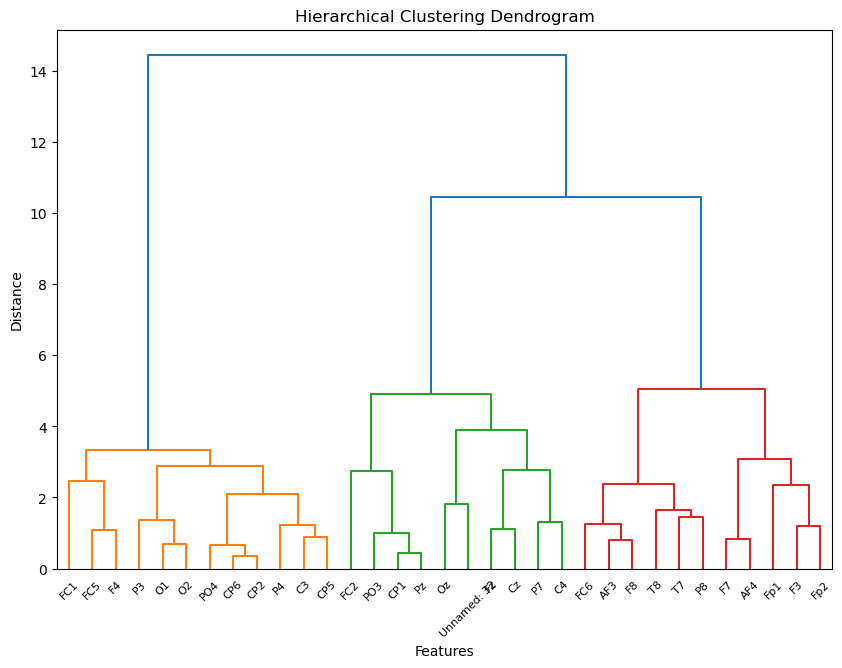

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Ensure there are no NaN or infinite values in the correlation table
correlation_table = correlation_table.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
correlation_table = correlation_table.fillna(0)  # Replace NaNs with 0 (or you can use any other strategy)

# Step 1: Convert Correlation Matrix to Distance Matrix
distance_matrix = 1 - correlation_table

# Step 2: Perform Hierarchical Clustering using 'ward' linkage method
Z = linkage(pdist(distance_matrix), method='ward')

# Step 3: Create Dendrogram to visualize clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=correlation_table.columns)  # Use your actual column names as labels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()

In [11]:
# Sort the linkage matrix by the third column (distance)
Z_sorted = Z[Z[:, 2].argsort()]

# Create a DataFrame to show the result in a table format
df = pd.DataFrame(Z_sorted, columns=["Cluster 1", "Cluster 2", "Distance", "Size of New Cluster"])

# Display the top 10 largest distances
df_top_10 = df.head(10)

# Display the result
print(df_top_10)

   Cluster 1  Cluster 2  Distance  Size of New Cluster
0       26.0       27.0  0.351994                  2.0
1        9.0       15.0  0.436692                  2.0
2       30.0       33.0  0.650820                  3.0
3       13.0       31.0  0.687023                  2.0
4        1.0       20.0  0.790759                  2.0
5        3.0       17.0  0.838570                  2.0
6        6.0        8.0  0.876185                  2.0
7       12.0       34.0  0.989663                  3.0
8        4.0       19.0  1.078286                  2.0
9       18.0       23.0  1.115840                  2.0
